## About
This program examines the lead-lag relationships among cryptocurrencies using a module for the 
estimation of the lead-lag from non-synchronous data <a href='https://github.com/philipperemy/lead-lag'>(link)</a>.


## Import modules

In [1]:
import numpy as np
import pandas as pd
import lead_lag
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

## Load historical data

#### Set start date and end date

In [2]:
start_date = '2021-06-01 00:00:00'
end_date = '2021-06-17 00:00:00' 

#### Load historical data from FTX exchange  <a href='https://www.cryptodatadownload.com/data/ftx/'>(link)</a>

In [3]:
tickers = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BCH-USD', 'BNB-USD', 'LINK-USD', 'TRX-USD', 'XRP-USD']

In [4]:
df = pd.DataFrame()
for t in tickers:
    filename = ''.join(t.split('-'))
    # minutely data
    df[t] = pd.read_csv('data/crypto_2021b/FTX_' + filename + '_minute.csv', index_col='date',
                         parse_dates=True, header=1)['open']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757141 entries, 2021-06-18 08:17:00 to 2020-01-01 00:00:00
Data columns (total 8 columns):
BTC-USD     757141 non-null float64
ETH-USD     757132 non-null float64
LTC-USD     657753 non-null float64
BCH-USD     657735 non-null float64
BNB-USD     757129 non-null float64
LINK-USD    597164 non-null float64
TRX-USD     588016 non-null float64
XRP-USD     468358 non-null float64
dtypes: float64(8)
memory usage: 52.0 MB


In [6]:
df.head(5)

,BTC-USD,ETH-USD,LTC-USD,BCH-USD,BNB-USD,LINK-USD,TRX-USD,XRP-USD
date,,,,,,,,
2021-06-18 08:17:00,37858.0,2351.3,166.910,597.975,355.600,22.8900,0.074430,0.843450
2021-06-18 08:16:00,37859.0,2352.2,166.825,597.850,355.403,22.8855,0.074295,0.843675
2021-06-18 08:15:00,37813.0,2348.4,166.460,596.625,355.158,22.8515,0.074112,0.843675
2021-06-18 08:14:00,37826.0,2350.9,166.530,596.625,355.173,22.8760,0.074057,0.843600
2021-06-18 08:13:00,37848.0,2353.9,166.680,597.000,355.486,22.8860,0.074230,0.843100


In [7]:
df.tail(5)

,BTC-USD,ETH-USD,LTC-USD,BCH-USD,BNB-USD,LINK-USD,TRX-USD,XRP-USD
date,,,,,,,,
2020-01-01 00:04:00,7156.5,128.43,NaN,NaN,13.660,NaN,NaN,NaN
2020-01-01 00:03:00,7154.0,128.43,NaN,NaN,13.656,NaN,NaN,NaN
2020-01-01 00:02:00,7154.5,128.44,NaN,NaN,13.661,NaN,NaN,NaN
2020-01-01 00:01:00,7157.5,128.50,NaN,NaN,13.661,NaN,NaN,NaN
2020-01-01 00:00:00,7164.5,128.59,NaN,NaN,13.681,NaN,NaN,NaN


#### Plot historical data

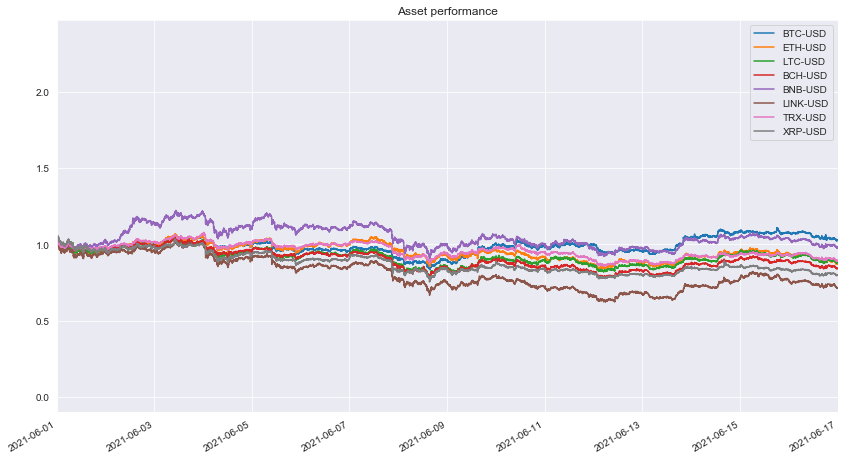

In [8]:
title = 'Asset performance'
start_idx = int(df.index.get_loc(start_date))
ax = (df/df.iloc[start_idx]).plot(figsize=(14,8),title=title)
ax.set_xlim(start_date, end_date)
ax.set(xlabel='');

## Explore the lead-lag relationships

#### Define a function to convert the dataframe into the lead-lag module format

In [9]:
def convert_to_ll_format(series, start_date, end_date, rule=None):
    """
    Pass in a series, a start date, an end date, the rule for resampling,
    and returns a numpy array formatted for the lead_lag module.
    """ 
    if rule is not None:
        series = series.resample(rule=rule).mean()
    series = series.loc[start_date:end_date].fillna(method='ffill')
    array = np.column_stack((range(len(series)), series))
    return array

#### Calculate the lead-lag effects

---------------------------------------------
Comparing BTC-USD & ETH-USD
Estimated lag = 0 mins.


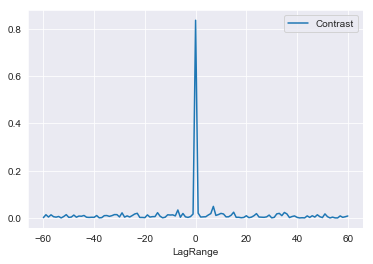

---------------------------------------------
Comparing BTC-USD & LTC-USD
Estimated lag = 0 mins.


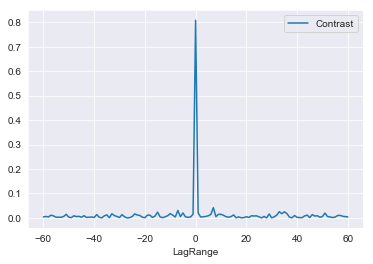

---------------------------------------------
Comparing BTC-USD & BCH-USD
Estimated lag = 0 mins.


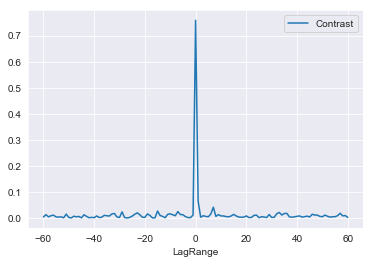

---------------------------------------------
Comparing BTC-USD & BNB-USD
Estimated lag = 0 mins.


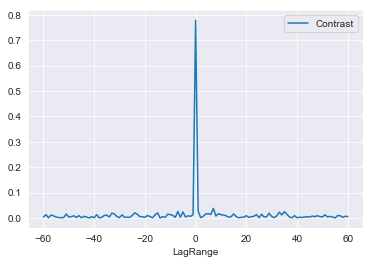

---------------------------------------------
Comparing BTC-USD & LINK-USD
Estimated lag = 0 mins.


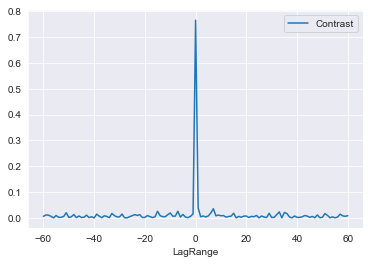

---------------------------------------------
Comparing BTC-USD & TRX-USD
Estimated lag = 0 mins.


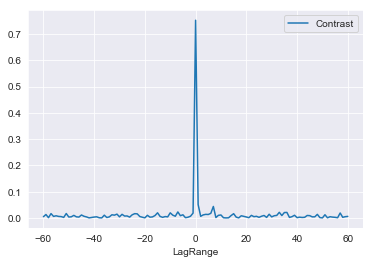

---------------------------------------------
Comparing BTC-USD & XRP-USD
Estimated lag = 0 mins.


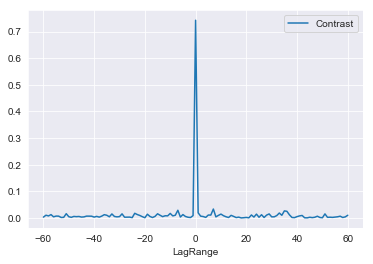

---------------------------------------------
Comparing ETH-USD & LTC-USD
Estimated lag = 0 mins.


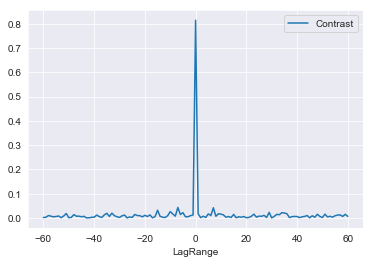

---------------------------------------------
Comparing ETH-USD & BCH-USD
Estimated lag = 0 mins.


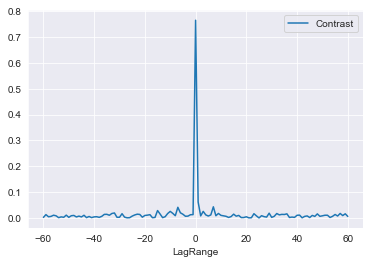

---------------------------------------------
Comparing ETH-USD & BNB-USD
Estimated lag = 0 mins.


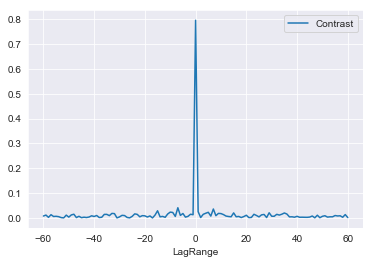

---------------------------------------------
Comparing ETH-USD & LINK-USD
Estimated lag = 0 mins.


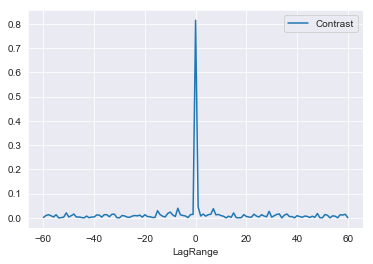

---------------------------------------------
Comparing ETH-USD & TRX-USD
Estimated lag = 0 mins.


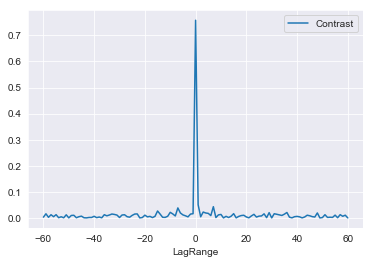

---------------------------------------------
Comparing ETH-USD & XRP-USD
Estimated lag = 0 mins.


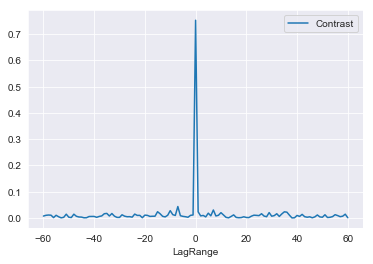

---------------------------------------------
Comparing LTC-USD & BCH-USD
Estimated lag = 0 mins.


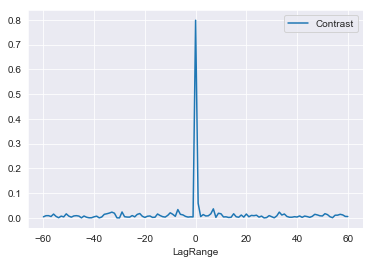

---------------------------------------------
Comparing LTC-USD & BNB-USD
Estimated lag = 0 mins.


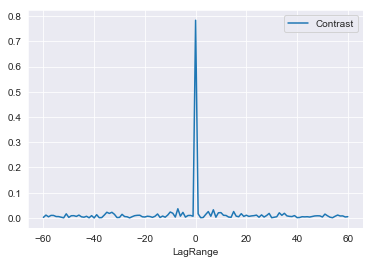

---------------------------------------------
Comparing LTC-USD & LINK-USD
Estimated lag = 0 mins.


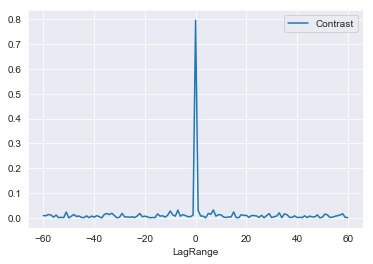

---------------------------------------------
Comparing LTC-USD & TRX-USD
Estimated lag = 0 mins.


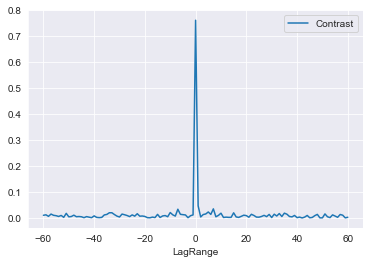

---------------------------------------------
Comparing LTC-USD & XRP-USD
Estimated lag = 0 mins.


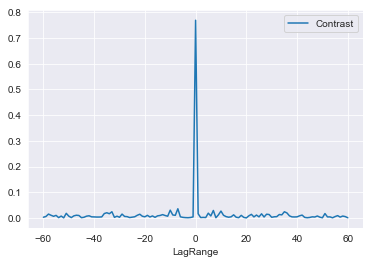

---------------------------------------------
Comparing BCH-USD & BNB-USD
Estimated lag = 0 mins.


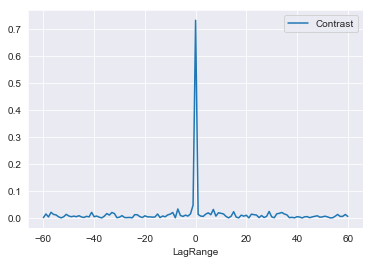

---------------------------------------------
Comparing BCH-USD & LINK-USD
Estimated lag = 0 mins.


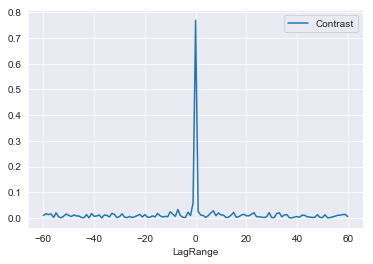

---------------------------------------------
Comparing BCH-USD & TRX-USD
Estimated lag = 0 mins.


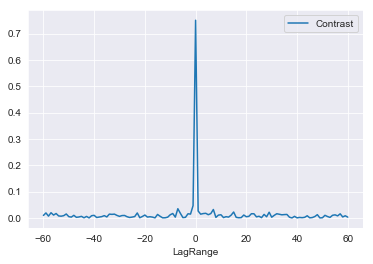

---------------------------------------------
Comparing BCH-USD & XRP-USD
Estimated lag = 0 mins.


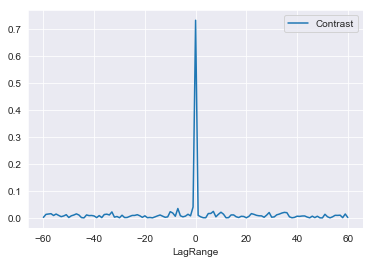

---------------------------------------------
Comparing BNB-USD & LINK-USD
Estimated lag = 0 mins.


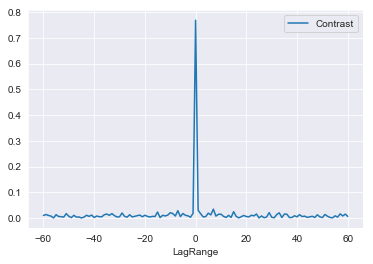

---------------------------------------------
Comparing BNB-USD & TRX-USD
Estimated lag = 0 mins.


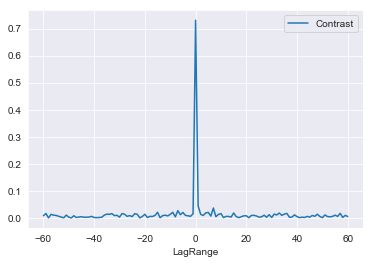

---------------------------------------------
Comparing BNB-USD & XRP-USD
Estimated lag = 0 mins.


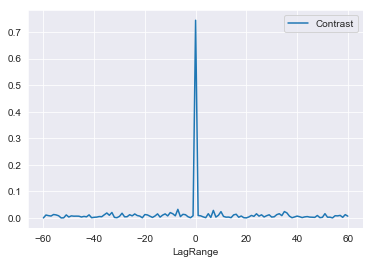

---------------------------------------------
Comparing LINK-USD & TRX-USD
Estimated lag = 0 mins.


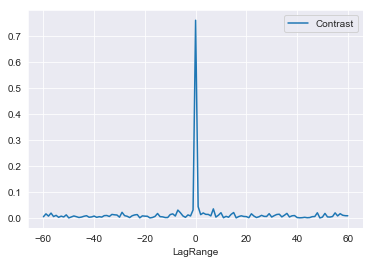

---------------------------------------------
Comparing LINK-USD & XRP-USD
Estimated lag = 0 mins.


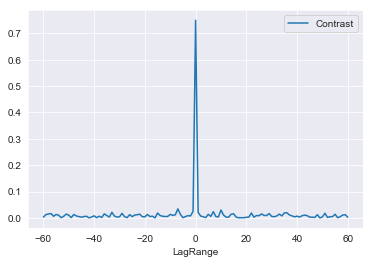

---------------------------------------------
Comparing TRX-USD & XRP-USD
Estimated lag = 0 mins.


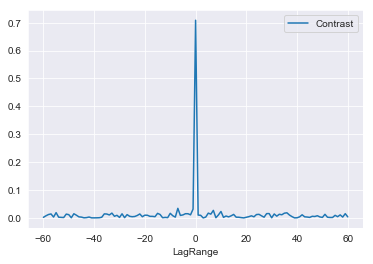

In [10]:
for x,y in combinations(tickers, 2):
    print('---------------------------------------------')
    print('Comparing ' + x + ' & ' + y)
    ll = lead_lag.LeadLag(convert_to_ll_format(df[x], start_date, end_date, rule='min'), 
                          convert_to_ll_format(df[y], start_date, end_date, rule='min'), 
                          max_absolute_lag=60, verbose=False)
    ll.run_inference(multi_threading=True)
    print(f'Estimated lag = {ll.lead_lag} mins.')
    ll.plot_results()